# Advaced pangaeapy usage: Generalized Additive Models (GAM)

This example is inspired by the excellent blog post by Gavin Simpson who was using PANGAEA data and pangaear to apply GAM on a foraminiferal d18Orecord. 
The blog ost can be found here:
https://www.fromthebottomoftheheap.net/2016/12/16/pangaea-r-open-palaeo-data/

In [1]:
from pangaeapy import PanDataSet
from matplotlib import pyplot as plt

In addition to pangaepy and matplotlib for plotting we need the pygam module developed by Daniel Servén (https://github.com/dswah/pyGAM) 

In [2]:
from pygam import LinearGAM

Now we load the dataset an plot d18o against Age to see the data:

In [3]:
ds = PanDataSet('10.1594/PANGAEA.857573')

<Axes: xlabel='Age'>

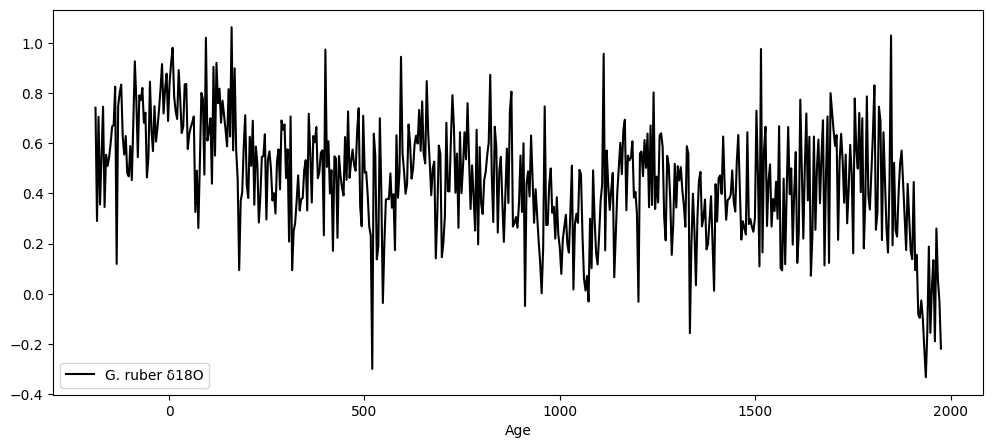

In [4]:
ds.data.plot(x='Age',y='G. ruber δ18O', figsize=(12,5), color='k')

In [5]:
X=ds.data['Age'].values
y=ds.data['G. ruber δ18O'].values

We plot the data using matplotlib and perform a LinearGAM fit. Using the 'lam' and 'n_splines' attributes we can control smoothness of the curve fitting.
Then we add a plot of the 95% confidence intervals as a shaded area. Voila:

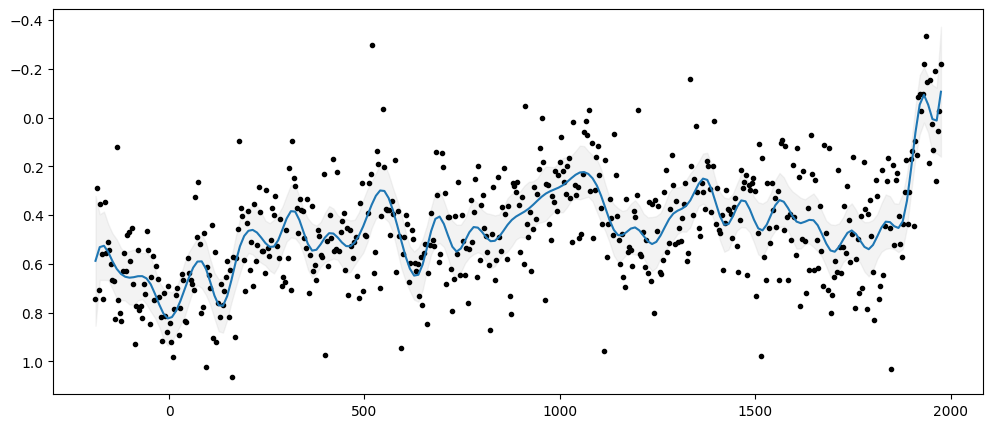

In [12]:
fig = plt.figure(figsize = (12,5))
plt.plot(X,y, '.',color='k', label='observations')
gam=LinearGAM(lam=0.00007, n_splines=50).fit(X,y)
XX=gam.generate_X_grid(term=0, n=200)
yConf=gam.confidence_intervals(XX, width=.95)
plt.plot(XX, gam.predict(XX))
#plt.plot(XX, yConf, color='y', ls='--')
plt.fill_between(XX[:,0], yConf[:,0], yConf[:,1], color='grey', alpha=0.09)
plt.gca().invert_yaxis()

In [ ]:
gam.summary()